In [7]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("EXT_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))
ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))
print(accounts)
# counter for figures
counter = 0
browser_freq = 0
browser_infreq = 0


### CONSTANTS ###
ANDROID_INTENSITY = "android_intensity"
ANDROID = "android"
BROWSER = "browser" # habitlab goal, i.e. facebook/spend_less_time or custom/spend_less_time_developers.slashdot.org
BROWSER_DOMAIN = "browser_domain"
SHARED = "shared"
PACKAGES = "packages"
OTHER_FREQUENCY = "other_frequency"
TIME = "time"
from datetime import date, datetime
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
BROWSER = "browser"
HASH = "email_hash"
GOALS = "goals"
DAY = "day"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
GOAL_TIME = "goal_time"
FREQ_TIME = "freq_time"
INFREQ_TIME = "infreq_time"
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
BROWSER_INTENSITY = "browser_intensity"
NUM_BROWSER_GOALS = "num_browser_goals"
NUM_INTER = "number_interventions"
NUM_SESSIONS = "number_sessions"
TARGET_TIME = "target_time"
CATEGORY = "category"
# Associate users with domain name which will function as our key.
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['www', 'aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 
        'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 
        'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 
        'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 
        'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 
        'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 
        'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot',
        'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 
        'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb',
        'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 
        'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 
        'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io',
        'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot',
        'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 
        'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 
        'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 
        'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn',
        'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 
        'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off',
        'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 
        'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa',
        'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb',
        'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski',
        'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 
        'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 
        'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 
        'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 
        'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']




def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]  
        
def organize_stats(shared_goals, stats, device, counts, user_id):
    """
    Organizes that stats object into shared_goals for device.
    @param shared_goals: dictionary
    @param stats:  stats object returned from freq_stats
    @param device: ANDROID or BROWSER
    """
    for iso in stats:
        for freq in stats[iso]:
            for goal in stats[iso][freq]:
                name = get_name(goal, device)
                if name not in shared_goals:
                    shared_goals[name] = {ANDROID: {PACKAGES:[]} , BROWSER: {PACKAGES:[]} }
                if goal not in shared_goals[name][device][PACKAGES]:
                    shared_goals[name][device][PACKAGES].append(goal)
                    shared_goals[name][device][goal] = {}
                if iso not in shared_goals[name][device][goal]:
                    shared_goals[name][device][goal][iso] = freq
                    if device == BROWSER:
                        counts[freq] += 1
                # Before I submitted the update, some apps under the same name wouldn't have the same freq setting.
                elif shared_goals[name][device][goal][iso] != freq:
                    shared_goals[name][device][goal][iso] = "both"
                    counts["both"] += 1
                if len(shared_goals[name][ANDROID][PACKAGES]) > 0 and len(shared_goals[name][BROWSER][PACKAGES]) > 0:
                    shared_goals[SHARED].add(name)

/home/drew/habitlab-data-analysis
[{'_id': '0744f7e9f4323685b86a1522b101550c9415ba2488d7e77649b3f21f2adc0d3f', 'android': ['9cb8c59eabbb60ad6447345c'], 'browser': []}, {'_id': 'e8493f5e2cc89f1ca9328c889763125a1a117bd0e8f4e428100450f9da987006', 'android': ['b219926d16e6e46fa426cafd'], 'browser': []}, {'_id': '739e11589479d8e6b88aec1b86ec8c4a023691db6c9d0aab05a4b3a508b0e2db', 'android': ['U1532437453047928'], 'browser': []}, {'_id': 'c3e36aee683e96002d1441743cf8580ebe5e4916e76c049a97c89422b69477fd', 'android': ['010cf6179f52b3d62184ee17'], 'browser': []}, {'_id': 'd0ed3649a5a7e59e6314bcf67879e6ede0376a2a85736382fdf157a0ae2efd33', 'android': ['0b0d1da5c036cb9637aff5d5'], 'browser': []}, {'_id': 'c09060490d493d24c53f6741c911bd4b55c1a57fa157e89c24c8ee566dbec273', 'android': ['f6c5e87bbe828ffc4278d4b7'], 'browser': []}, {'_id': '1a59ec7d9cd85320e025638f99736d66cc997dbe3ee1755d270b2421feefd904', 'android': ['38a4b3e06ead18a13442f5a7'], 'browser': []}, {'_id': 'd1357b13ea581480a3f4d756bd1c32ed

In [60]:
acc_dev_day_inter = {}
devices = [ANDROID, BROWSER]
import moment
from time_utils import epoch_to_date
counter = 0
funky_days = 0
for account in accounts:
    counter += 1
    acc = account["_id"]
    acc_dev_day_inter[acc] = {}
    print(counter/len(accounts))
    if len(account[ANDROID]) > 0 and len(account[BROWSER]) > 0:
        # interventions
        for user in account[ANDROID]:
            for s in db[user + "_sessions"].find({"interventions": {"$exists" :True}, "enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
                time = moment.unix(s["timestamp"])
                date = time.format("YYYY-MM-DD")
                if date not in acc_dev_day_inter[acc]:
                    acc_dev_day_inter[acc][date] = {device: {NUM_INTER: 0, NUM_SESSIONS: 0, OTHER_TIME:0, GOAL_TIME: 0, TOTAL_TIME: 0, GOALS: set([])} for device in devices}
                acc_dev_day_inter[acc][date][ANDROID][TOTAL_TIME] += s["duration"]
                acc_dev_day_inter[acc][date][ANDROID][NUM_SESSIONS] += 1
                if s["enabled"]:
                    acc_dev_day_inter[acc][date][ANDROID][GOAL_TIME] += s["duration"]
                    acc_dev_day_inter[acc][date][ANDROID][GOALS].add(s["domain"])
                else:
                    acc_dev_day_inter[acc][date][ANDROID][OTHER_TIME] += s["duration"]
                acc_dev_day_inter[acc][date][ANDROID][NUM_INTER] += len(s["interventions"])
        for user in account[BROWSER]:
            for stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt":930}}):
                date = epoch_to_date(int(stat['key2']))
                if date in acc_dev_day_inter[acc]:
                    if "domain_time" not in acc_dev_day_inter[acc][date][BROWSER]:
                        acc_dev_day_inter[acc][date][BROWSER]["domain_time"] = {}
                    name = stat['key']
                    if name not in acc_dev_day_inter[acc][date][BROWSER]["domain_time"] or stat['val'] > acc_dev_day_inter[acc][date][BROWSER]["domain_time"][name]:
                        acc_dev_day_inter[acc][date][BROWSER]["domain_time"][name] = stat['val']
            for intervention_stat in ext_db[user + "_synced:interventions_active_for_domain_and_session"].find():
                if ("is_preview_mode" not in intervention_stat or not intervention_stat["is_preview_mode"]) and (
                        "developer_mode" not in intervention_stat or not intervention_stat["developer_mode"]):
                    moment_obj = moment.unix(intervention_stat["timestamp_local"])
                    date = moment_obj.format("YYYY-MM-DD")
                    if date in acc_dev_day_inter[acc] and len(intervention_stat["val"]) > 0:
                        if "intervention_sessions" not in acc_dev_day_inter[acc][date][BROWSER]:
                            acc_dev_day_inter[acc][date][BROWSER]["intervention_sessions"] = set([])
                        acc_dev_day_inter[acc][date][BROWSER]["intervention_sessions"].add(intervention_stat["key"] +" " + str(intervention_stat["key2"]))
                        acc_dev_day_inter[acc][date][BROWSER][GOALS].add(intervention_stat["key"])
                elif "is_preview_mode" in intervention_stat:
                    print(intervention_stat)
            for ses_stat in ext_db[user + "_synced:seconds_on_domain_per_session"].find():
                moment_obj = moment.unix(ses_stat["timestamp_local"])
                date = moment_obj.format("YYYY-MM-DD")
                if date in acc_dev_day_inter[acc]:
                    if "all_sessions" not in acc_dev_day_inter[acc][date][BROWSER]:
                        acc_dev_day_inter[acc][date][BROWSER]["all_sessions"] = set([])
                    acc_dev_day_inter[acc][date][BROWSER]["all_sessions"].add(ses_stat["key"] +" " + str(ses_stat["key2"]))
                        
        # Now let's validate that the data isn't funky.
        for date in acc_dev_day_inter[acc]:
            if "intervention_sessions" in acc_dev_day_inter[acc][date][BROWSER] and "domain_time" in acc_dev_day_inter[acc][date][BROWSER]:
                sessions_not_counted = acc_dev_day_inter[acc][date][BROWSER]["intervention_sessions"].difference(acc_dev_day_inter[acc][date][BROWSER]["all_sessions"])
                if (len(sessions_not_counted) < .1 * len(acc_dev_day_inter[acc][date][BROWSER]["all_sessions"])):
                    obj = acc_dev_day_inter[acc][date][BROWSER]
                    #print("before addition:")
                    #print(obj[TOTAL_TIME])
                    #print(obj[GOAL_TIME])
                    #print(obj[OTHER_TIME])
                    obj[NUM_INTER] += len(obj["intervention_sessions"])
                    obj[NUM_SESSIONS] += len(obj["all_sessions"])
                    obj[GOAL_TIME] += sum([obj["domain_time"][n] for n in obj["domain_time"] if n in obj[GOALS]])
                    obj[OTHER_TIME] += sum([obj["domain_time"][n] for n in obj["domain_time"] if n not in obj[GOALS]])
                    obj[TOTAL_TIME] += obj[GOAL_TIME] + obj[OTHER_TIME]
                    if obj[GOAL_TIME] + obj[OTHER_TIME] != obj[TOTAL_TIME]:
                        print(acc + " "+ str(obj[TOTAL_TIME]) + " " + str(obj[OTHER_TIME]) + " " + str(obj[GOAL_TIME]))
                else: 
                    funky_days += 1
                    print("data is too funky: " + str(len(sessions_not_counted)/len(acc_dev_day_inter[acc][date][BROWSER]["all_sessions"])))

                    
                

                

0.0006684491978609625
0.001336898395721925
0.002005347593582888
0.00267379679144385
0.0033422459893048127
0.004010695187165776
0.004679144385026738
0.0053475935828877
0.006016042780748663
0.0066844919786096255
0.007352941176470588
0.008021390374331552
0.008689839572192513
0.009358288770053475
0.010026737967914439
0.0106951871657754
0.011363636363636364
0.012032085561497326
0.01270053475935829
0.013368983957219251
0.014037433155080214
0.014705882352941176
0.01537433155080214
0.016042780748663103
0.016711229946524065
0.017379679144385027
0.01804812834224599
0.01871657754010695
0.019385026737967916
0.020053475935828877
0.02072192513368984
0.0213903743315508
0.022058823529411766
0.022727272727272728
0.02339572192513369
0.02406417112299465
0.024732620320855617
0.02540106951871658
0.02606951871657754
0.026737967914438502
0.027406417112299464
0.02807486631016043
0.02874331550802139
0.029411764705882353
0.030080213903743314
0.03074866310160428
0.03141711229946524
0.03208556149732621
0.03275401

0.2733957219251337
0.27406417112299464
0.2747326203208556
0.27540106951871657
0.27606951871657753
0.2767379679144385
0.27740641711229946
0.27807486631016043
0.2787433155080214
0.27941176470588236
0.2800802139037433
0.2807486631016043
0.28141711229946526
0.2820855614973262
0.2827540106951872
0.28342245989304815
0.2840909090909091
0.28475935828877
0.285427807486631
0.28609625668449196
0.2867647058823529
0.2874331550802139
0.28810160427807485
0.2887700534759358
0.2894385026737968
0.29010695187165775
0.2907754010695187
0.2914438502673797
0.29211229946524064
0.2927807486631016
0.2934491978609626
0.29411764705882354
0.2947860962566845
0.29545454545454547
0.29612299465240643
0.2967914438502674
0.29745989304812837
0.29812834224598933
0.29879679144385024
0.2994652406417112
0.30013368983957217
0.30080213903743314
0.3014705882352941
0.30213903743315507
0.30280748663101603
0.303475935828877
0.30414438502673796
0.3048128342245989
0.3054812834224599
0.30614973262032086
0.3068181818181818
0.307486631

0.5574866310160428
0.5581550802139037
0.5588235294117647
0.5594919786096256
0.5601604278074866
0.5608288770053476
0.5614973262032086
0.5621657754010695
0.5628342245989305
0.5635026737967914
0.5641711229946524
0.5648395721925134
0.5655080213903744
0.5661764705882353
0.5668449197860963
0.5675133689839572
0.5681818181818182
0.5688502673796791
0.56951871657754
0.5701871657754011
0.570855614973262
0.571524064171123
0.5721925133689839
0.5728609625668449
0.5735294117647058
0.5741978609625669
0.5748663101604278
0.5755347593582888
0.5762032085561497
0.5768716577540107
0.5775401069518716
0.5782085561497327
0.5788770053475936
0.5795454545454546
0.5802139037433155
0.5808823529411765
0.5815508021390374
0.5822192513368984
0.5828877005347594
0.5835561497326203
0.5842245989304813
0.5848930481283422
0.5855614973262032
0.5862299465240641
0.5868983957219251
0.5875668449197861
0.5882352941176471
0.588903743315508
0.589572192513369
0.5902406417112299
0.5909090909090909
0.5915775401069518
0.5922459893048129

0.8529411764705882
0.8536096256684492
0.8542780748663101
0.8549465240641712
0.8556149732620321
0.8562834224598931
0.856951871657754
0.857620320855615
0.8582887700534759
0.858957219251337
0.8596256684491979
0.8602941176470589
0.8609625668449198
0.8616310160427807
0.8622994652406417
0.8629679144385026
0.8636363636363636
0.8643048128342246
0.8649732620320856
0.8656417112299465
0.8663101604278075
0.8669786096256684
0.8676470588235294
0.8683155080213903
0.8689839572192514
0.8696524064171123
0.8703208556149733
0.8709893048128342
0.8716577540106952
0.8723262032085561
0.8729946524064172
0.8736631016042781
0.8743315508021391
0.875
0.8756684491978609
0.8763368983957219
0.8770053475935828
0.8776737967914439
0.8783422459893048
0.8790106951871658
0.8796791443850267
0.8803475935828877
0.8810160427807486
0.8816844919786097
0.8823529411764706
0.8830213903743316
0.8836898395721925
0.8843582887700535
0.8850267379679144
0.8856951871657754
0.8863636363636364
0.8870320855614974
0.8877005347593583
0.8883689

In [102]:
import math
import pandas as pd
AVG_GOAL_TIME = "avg_goal_time"
PORP_INT = "proportion_interventions"
props = [NUM_INTER, NUM_SESSIONS,  OTHER_TIME, GOAL_TIME, TOTAL_TIME]
all_props = [HASH]
for device in devices:
    for prop in props:
        all_props.append(device + "_" + prop)
        all_props.append(device + "_" + AVG_GOAL_TIME)
        all_props.append(device + "_" + PORP_INT)
data_frame_dict = {prop: [] for prop in all_props}
for acc in acc_dev_day_inter:
    for date in acc_dev_day_inter[acc]:
        # check if all time values > 0
        gt0 = True
        for device in devices:
            for prop in props:
                if "time" in prop and acc_dev_day_inter[acc][date][device][prop] == 0:
                    gt0 = False
        if gt0:
            data_frame_dict[HASH].append(acc)
            for device in devices:
                for prop in props:
                    if "time" in prop:
                        data_frame_dict[device + "_" + prop].append(math.log(acc_dev_day_inter[acc][date][device][prop]))
                    else:
                        data_frame_dict[device + "_" + prop].append((acc_dev_day_inter[acc][date][device][prop]))
                obj = acc_dev_day_inter[acc][date][device]
                data_frame_dict[device + "_" + PORP_INT].append(obj[NUM_INTER]/obj[NUM_SESSIONS])
                data_frame_dict[device+"_"+AVG_GOAL_TIME].append(math.log(obj[GOAL_TIME]/len(obj[GOALS])))
                
for prop in all_props:
    print(prop + "_" + str(len(data_frame_dict[prop])))
df = pd.DataFrame(data_frame_dict)
print(df)

email_hash_719
android_number_interventions_719
android_avg_goal_time_719
android_proportion_interventions_719
android_number_sessions_719
android_avg_goal_time_719
android_proportion_interventions_719
android_other_time_719
android_avg_goal_time_719
android_proportion_interventions_719
android_goal_time_719
android_avg_goal_time_719
android_proportion_interventions_719
android_total_time_719
android_avg_goal_time_719
android_proportion_interventions_719
browser_number_interventions_719
browser_avg_goal_time_719
browser_proportion_interventions_719
browser_number_sessions_719
browser_avg_goal_time_719
browser_proportion_interventions_719
browser_other_time_719
browser_avg_goal_time_719
browser_proportion_interventions_719
browser_goal_time_719
browser_avg_goal_time_719
browser_proportion_interventions_719
browser_total_time_719
browser_avg_goal_time_719
browser_proportion_interventions_719
                                            email_hash  \
0    2b4560fa696cfd842dc1cbcd24b12d1674

In [112]:
df.to_csv("2018-09-14-cross_device_intervention_effects")

(array([118., 151., 117.,  94.,  72.,  61.,  36.,  18.,  17.,  12.,   7.,
          2.,   4.,   0.,   4.,   1.,   1.,   3.,   0.,   1.]),
 array([   7.  ,  102.35,  197.7 ,  293.05,  388.4 ,  483.75,  579.1 ,
         674.45,  769.8 ,  865.15,  960.5 , 1055.85, 1151.2 , 1246.55,
        1341.9 , 1437.25, 1532.6 , 1627.95, 1723.3 , 1818.65, 1914.  ]),
 <a list of 20 Patch objects>)

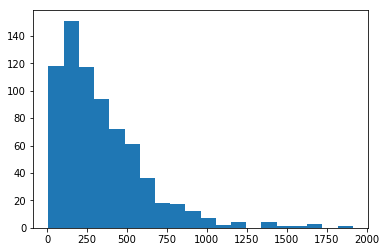

In [101]:
import matplotlib.pyplot as plt
plt.figure(12)
plt.hist([s for s in data_frame_dict[ANDROID+"_"+NUM_SESSIONS]], bins=20)

In [75]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [76]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
#library(ez)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [82]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( browser_total_time~ android_number_interventions  , data = df)
summary(results)


Call:
lm(formula = browser_total_time ~ android_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7245 -0.3937  0.1285  0.5795  2.2288 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   8.8688198  0.0461368   192.2   <2e-16 ***
android_number_interventions -0.0003827  0.0004783    -0.8    0.424    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8775 on 717 degrees of freedom
Multiple R-squared:  0.0008921,	Adjusted R-squared:  -0.0005013 
F-statistic: 0.6402 on 1 and 717 DF,  p-value: 0.4239



In [84]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( android_total_time~ browser_number_interventions  , data = df)
summary(results)


Call:
lm(formula = android_total_time ~ browser_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1993 -0.6543  0.0961  0.8380  2.2114 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.6646486  0.0530197 182.284   <2e-16 ***
browser_number_interventions -0.0002113  0.0023705  -0.089    0.929    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.113 on 717 degrees of freedom
Multiple R-squared:  1.108e-05,	Adjusted R-squared:  -0.001384 
F-statistic: 0.007942 on 1 and 717 DF,  p-value: 0.929



In [85]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( android_goal_time~ browser_number_interventions, data = df)
summary(results)


Call:
lm(formula = android_goal_time ~ browser_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0846 -0.6980  0.2669  0.9284  3.3676 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  7.904212   0.071212 110.996  < 2e-16 ***
browser_number_interventions 0.009017   0.003184   2.832  0.00475 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.495 on 717 degrees of freedom
Multiple R-squared:  0.01106,	Adjusted R-squared:  0.009684 
F-statistic: 8.021 on 1 and 717 DF,  p-value: 0.004753



In [86]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( browser_goal_time~ android_number_interventions , data = df)
summary(results)


Call:
lm(formula = browser_goal_time ~ android_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8221 -0.6735  0.2510  0.9781  2.8029 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.8560247  0.0787340  87.078   <2e-16 ***
android_number_interventions 0.0009372  0.0008162   1.148    0.251    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.497 on 717 degrees of freedom
Multiple R-squared:  0.001835,	Adjusted R-squared:  0.0004433 
F-statistic: 1.318 on 1 and 717 DF,  p-value: 0.2513



In [99]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( android_number_sessions~ browser_number_interventions  , data = df)
summary(results)


Call:
lm(formula = android_number_sessions ~ browser_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-331.04 -193.95  -77.89  118.76 1576.11 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  337.7409    13.1056  25.771   <2e-16 ***
browser_number_interventions   0.0373     0.5859   0.064    0.949    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 275.1 on 717 degrees of freedom
Multiple R-squared:  5.65e-06,	Adjusted R-squared:  -0.001389 
F-statistic: 0.004051 on 1 and 717 DF,  p-value: 0.9493



In [97]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( browser_number_sessions~ android_number_interventions, data = df)
summary(results)


Call:
lm(formula = browser_number_sessions ~ android_number_interventions, 
    data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-85.39 -46.89 -17.47  28.86 465.91 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  84.48608    3.52362  23.977   <2e-16 ***
android_number_interventions  0.02744    0.03653   0.751    0.453    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 67.01 on 717 degrees of freedom
Multiple R-squared:  0.0007863,	Adjusted R-squared:  -0.0006073 
F-statistic: 0.5642 on 1 and 717 DF,  p-value: 0.4528



In [103]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( browser_avg_goal_time~ android_number_interventions, data = df)
summary(results)

/home/drew/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)



Call:
lm(formula = browser_avg_goal_time ~ android_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5718 -0.6353  0.2174  0.8626  2.9942 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.1037255  0.0701890  86.961   <2e-16 ***
android_number_interventions 0.0013666  0.0007276   1.878   0.0607 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.335 on 717 degrees of freedom
Multiple R-squared:  0.004896,	Adjusted R-squared:  0.003508 
F-statistic: 3.528 on 1 and 717 DF,  p-value: 0.06075



In [110]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( android_avg_goal_time~ browser_number_interventions, data = df)
summary(results)


Call:
lm(formula = android_avg_goal_time ~ browser_proportion_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7831 -0.6927  0.0958  0.7752  3.5402 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       6.73252    0.08091   83.21   <2e-16 ***
browser_proportion_interventions  0.11875    0.39543    0.30    0.764    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.289 on 717 degrees of freedom
Multiple R-squared:  0.0001258,	Adjusted R-squared:  -0.001269 
F-statistic: 0.09018 on 1 and 717 DF,  p-value: 0.764



In [111]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm( browser_avg_goal_time~ android_number_interventions, data = df)
summary(results)


Call:
lm(formula = browser_avg_goal_time ~ android_number_interventions, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5718 -0.6353  0.2174  0.8626  2.9942 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.1037255  0.0701890  86.961   <2e-16 ***
android_number_interventions 0.0013666  0.0007276   1.878   0.0607 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.335 on 717 degrees of freedom
Multiple R-squared:  0.004896,	Adjusted R-squared:  0.003508 
F-statistic: 3.528 on 1 and 717 DF,  p-value: 0.06075

